In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import combine_pvalues

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)



C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [9]:
combine_pvalues([row['Fisher exact p-value DL'], row['Fisher exact p-value DL']])

SignificanceResult(statistic=0.0003050365258680295, pvalue=0.9999999883702723)

In [13]:
#Combining p-values doesn't do much...
v = pd.read_csv("Finalizing_PerGene_AbsLogfc_DLNeuron_Top20th_FisherExact_NonCod_MAFCut0.25_SpecSup0_PhyloPCut-100_PhastConsCut-1.csv")
v = v.set_index("Gene")
v.columns = [x + " DL" for x in v.columns]
v2 = pd.read_csv("Finalizing_PerGene_NoPseudos_FisherExact_NonCod_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut-1.csv").set_index("Gene")
v = v.join(v2).dropna()
comb = []
for index, row in v.iterrows():
    comb.append(combine_pvalues([row['Fisher exact p-value DL'], row['Fisher exact p-value']])[1])
v["Combined p-value"] = comb
v["Combined FDR"] = fdrcorrection(v["Combined p-value"])[1]
v.sort_values("Combined p-value").head(50)

,Median Fixed PhyloP DL,Number Fixed Variants DL,Median Polymorphic PhyloP DL,Number Polymorphic Variants DL,Fisher exact p-value DL,alpha DL,Number crosses DL,Crosses DL,Tag DL,"[[dc, pc], [du, pu]] DL",...,Number Polymorphic Variants,Fisher exact p-value,alpha,Number crosses,Crosses,Tag,"[[dc, pc], [du, pu]]",FDR,Combined p-value,Combined FDR
Gene,,,,,,,,,,,,,,,,,,,,,
LHX5,0.030791,246,0.030585,127,0.000822,0.597662,0.106711,"[0.10421386689130294, 0.5237652033124685, 0.58...","dc > 0.1, likely stable","[[48, 198], [9, 118]]",...,188.0,0.000468,0.535170,1.531968,"[1.4732440881763527, 8.755050901803605, 12.924...","dc > 0.1, likely stable","[[53, 426], [6, 182]]",0.398374,0.000006,0.030944
NEO1,0.029898,181,0.028221,58,0.047261,0.480073,0.108954,"[0.03337896049491784, 0.1069653139775992, 0.41...","dc > 0.1, likely stable","[[38, 143], [6, 52]]",...,164.0,0.000157,0.703389,1.983953,"[0.500890180360722, 1.929024849699399, 13.7386...","dc > 0.1, likely stable","[[62, 562], [3, 161]]",0.398374,0.000095,0.242053
ALKBH3,0.027771,68,0.018325,30,0.069938,0.772925,0.063294,"[0.05926721798847612, 0.4096338752815438, 0.48...","dc > 0.1, likely stable","[[20, 48], [4, 26]]",...,102.0,0.000601,0.386416,-0.023800,"[-0.06601563126252508, 3.564563126252505, 5.63...","dc > 0.1, likely stable","[[133, 74], [45, 57]]",0.400110,0.000466,0.483023
GTF2A1,0.023664,130,0.024510,45,0.082143,0.404570,0.191496,"[0.059598998528577196, 0.18900703156232473, 0....","dc < 0.1, may be unstable","[[13, 117], [1, 44]]",...,115.0,0.000549,0.477448,0.388752,"[0.3363146292585171, 10.981]","dc > 0.1, likely stable","[[115, 240], [19, 96]]",0.398374,0.000496,0.483023
PDP1,0.033254,208,0.031243,68,0.140594,0.325247,0.159462,"[0.06554703166899406, 0.15554852103034472, 0.6...","dc > 0.1, likely stable","[[31, 177], [6, 62]]",...,129.0,0.000514,0.506542,0.383844,"[0.34354709418837714, 7.6776]","dc > 0.1, likely stable","[[136, 243], [26, 103]]",0.398374,0.000761,0.483023
PRMT6,0.030660,822,0.025809,251,0.000395,0.453343,0.100300,"[0.0962447985370421, 0.5747863562907576, 0.591...","dc > 0.1, likely stable","[[184, 638], [32, 219]]",...,873.0,0.224173,0.281833,3.064741,"[0.3579318637274511, 2.9851286573146254, 5.134...","dc < 0.1, may be unstable","[[55, 3773], [9, 864]]",0.704180,0.000914,0.483023
GDA,0.024177,93,0.016406,34,0.019160,0.711801,0.040481,"[0.039129308157290585, 0.21081415534480963, 0....","dc > 0.1, likely stable","[[36, 57], [6, 28]]",...,108.0,0.004783,0.571755,1.211078,"[1.1822757515030062, 7.4612]","dc > 0.1, likely stable","[[46, 286], [5, 103]]",0.552208,0.000944,0.483023
DPP4,0.023640,153,0.020170,38,0.011301,0.648547,0.043703,"[0.041095907029258555, 0.1219207690815231, 0.1...","dc > 0.1, likely stable","[[60, 93], [7, 31]]",...,109.0,0.008336,0.277866,0.199457,"[0.16420200400801477, 2.3500312625250483, 3.19...","dc > 0.1, likely stable","[[274, 288], [39, 70]]",0.552208,0.000968,0.483023
DPF3,0.033550,561,0.020708,128,0.000954,0.310003,0.018545,"[0.8125192761840483, 1.2388406695284973, 1.672...","dc > 0.1, likely stable","[[383, 178], [68, 60]]",...,332.0,0.099199,0.198409,0.696574,"[0.6341519038076164, 3.3807218436873754, 6.189...","dc > 0.1, likely stable","[[336, 1029], [70, 262]]",0.641955,0.000971,0.483023


In [1]:
len(["Gene", "Median Fixed PhyloP", "Number Fixed Variants", "Median Polymorphic PhyloP", "Number Polymorphic Variants", "Fisher exact p-value", "MWU p-value", "Fisher exact p-value; alt greater", "MWU p-value; alt greater" "alpha", "Cutoff", "[[dc, du], [pc, pu]]", "Proportion"])

12

In [3]:

hpo = pd.read_csv("../DPSC_CNCC/HPO_AccelEvol_Input.txt", sep= "\t")
d_HPO = {}

for index, row in hpo.iterrows():
    d_HPO[row["Term"]] = row["Genes"].split(";")

gobp = pd.read_csv("../DPSC_CNCC/GOBP_AccelEvol_Input.txt", sep= "\t")
d_BP = {}

for index, row in gobp.iterrows():
    d_BP[row["Term"]] = row["Genes"].split(";")

In [22]:
vs[vs["Gene"].isin(d_HPO['Delayed skeletal maturation'])].sort_values("Permuted p-value")

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,alpha,Cutoff,Crosses,Tag,"[[dc, du], [pc, pu]]",Permuted z-score,Permuted p-value,Median permuted alpha,FDR
596,CPLX1,0.022288,328,0.019456,163,0.093276,0.566737,0.164056,"[0.06703743944553106, 0.1640555722912305, 0.53...","dc < 0.1, may be unstable","[[18, 310], [4, 159]]",2.118548,0.017064,0.114960,0.539090
20,PROKR2,0.038008,195,0.033748,80,0.002032,0.767544,0.133277,"[0.13327733711727288, 0.5895754729153586, 0.66...","dc > 0.1, likely stable","[[36, 159], [4, 76]]",1.947370,0.025745,0.151033,0.322994
678,SOX9,0.035398,1268,0.037719,347,0.107279,0.331251,0.210689,"[0.21068900918651384, 0.2868250514095102, 0.31...","dc < 0.1, may be unstable","[[75, 1193], [14, 333]]",1.842278,0.032717,0.075417,0.544911
85,TAB2,0.037745,271,0.029969,115,0.011828,0.568513,0.123951,"[0.12395136715674154, 0.4209485475167736, 0.50...","dc > 0.1, likely stable","[[49, 222], [10, 105]]",1.690076,0.045507,0.150321,0.454088
7,MAP3K1,0.044051,214,0.026869,62,0.000835,0.648196,0.052105,"[0.05210508833651302, 0.15194095711590783, 0.1...","dc > 0.1, likely stable","[[97, 117], [14, 48]]",1.605120,0.054234,0.176777,0.318711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,COL2A1,0.026289,107,0.028728,64,0.802092,-0.244444,0.027481,"[0.08727727662922646, 0.26666622159216835, 0.5...","dc > 0.1, likely stable","[[51, 56], [34, 30]]",-1.026456,0.847662,0.176483,0.898309
3097,EXT1,0.046289,446,0.041780,103,0.805833,-0.186728,0.073468,"[0.07346831772857715, 0.186925412208917, 0.311...","dc > 0.1, likely stable","[[139, 307], [36, 67]]",-1.062005,0.855883,0.114931,0.898938
3231,ZBTB16,0.034479,335,0.038968,83,0.872897,-0.286809,0.050258,"[0.050258116491170346, 0.06869506803896994, 0....","dc > 0.1, likely stable","[[125, 210], [36, 47]]",-1.120670,0.868786,0.138837,0.934475
3274,ACAN,0.029603,208,0.037051,55,0.902154,-0.555556,0.120767,"[0.05828534063415633, 0.12076698679038478, 0.1...","dc > 0.1, likely stable","[[26, 182], [10, 45]]",-1.885215,0.970300,0.162791,0.953028


In [13]:
df.loc[359][0]

'Positive Regulation Of Vasculature Development (GO:1904018)'

In [13]:
vs.head(50)

,Term,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,MWU p-value,Fisher p-value,alpha,Number crosses,Crosses,Table,MWU FDR,Fisher FDR
0,KIF26B,1.4075,897,1.3275,603,0.000058,0.000086,0.373386,1.692328,"[1.6923276553106221, 6.643628256513028, 8.7510...","[[266, 631], [126, 477]]",0.375800,0.168777
1,ZRANB1,1.3025,447,1.1250,92,0.000149,0.000230,0.711712,1.558673,"[1.5586733466933862, 7.431]","[[111, 336], [8, 84]]",0.375800,0.280854
2,RYBP,1.4075,1646,1.3275,397,0.000174,0.003387,0.312870,1.671253,"[1.6712525050100195, 6.196247494989978, 6.9025...","[[432, 1214], [78, 319]]",0.375800,0.542370
3,MATN2,1.4475,263,1.2925,81,0.000220,0.000977,0.642063,1.636241,"[1.6362414829659317, 7.388999999999999]","[[86, 177], [12, 69]]",0.375800,0.451282
4,FHDC1,1.3925,508,1.2875,141,0.000272,0.002735,0.428483,1.400872,"[1.4008717434869742, 5.776503006012025, 6.9876...","[[249, 259], [50, 91]]",0.375800,0.515523
5,NOP56,1.5575,59,0.9525,31,0.000287,0.000283,0.821510,1.248734,"[1.2487344689378757, 2.7563436873747493, 3.004...","[[46, 13], [12, 19]]",0.375800,0.280854
6,TP53I11,1.3475,481,1.2125,190,0.000371,0.002199,0.396383,1.270446,"[1.270445891783567, 6.393036072144288, 7.15475...","[[283, 198], [88, 102]]",0.415497,0.515523
7,N6AMT1,1.4275,2109,1.3625,727,0.000473,0.000035,0.338503,1.729395,"[1.7293947895791582, 7.893000000000001]","[[577, 1532], [145, 582]]",0.436214,0.139041
8,FAM135B,1.3075,4511,1.2575,1035,0.000500,0.008993,0.152743,1.250708,"[5.766648296593186, 6.618712424849699, 9.11099...","[[2496, 2015], [530, 505]]",0.436214,0.638253
9,IL26,1.4325,116,1.2200,48,0.000699,0.000542,0.774603,1.561789,"[1.5617885771543085, 2.8188426853707416, 2.992...","[[45, 71], [6, 42]]",0.535934,0.325330


In [4]:
vs = pd.read_csv("Mus_musculus_domesticus_PhyloP447_NonCoding_PerGene_SpecSup75_MAF0.25-0.75.csv")
vs

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
0,Amy2a5,-0.0690,1642,0.0440,679,3.337800e-10,7.701401e-07,1.000000,1.000000,-2.309469,2.183,"[[53, 1589], [67, 612]]","[[53, 1589], [68, 611]]",0.9
1,Amy2a5,-0.0690,1642,0.0440,679,4.619807e-10,7.701401e-07,1.000000,1.000000,-1.231712,0.980,"[[165, 1477], [135, 544]]","[[165, 1477], [136, 543]]",0.8
2,Amy2a5,-0.0690,1642,0.0440,679,1.456997e-06,7.701401e-07,0.999999,1.000000,-0.660373,0.483,"[[336, 1306], [203, 476]]","[[337, 1305], [204, 475]]",0.7
3,Siah2,0.0380,193,0.6710,61,4.468705e-06,7.507263e-05,0.999999,0.999963,-5.568683,1.705,"[[12, 181], [18, 43]]","[[12, 181], [19, 42]]",0.7
4,Prss35,0.0570,230,0.4935,64,7.215356e-06,3.616373e-04,0.999999,0.999820,-4.492692,1.219,"[[17, 213], [19, 45]]","[[17, 213], [20, 44]]",0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29060,Elovl7,0.2870,202,0.2460,83,1.000000e+00,6.452664e-01,0.576930,0.322633,0.016186,1.471,"[[21, 181], [8, 75]]","[[21, 181], [9, 74]]",0.9
29061,Emilin2,0.1655,146,-0.0135,94,1.000000e+00,1.373533e-01,0.573581,0.068677,0.017806,1.545,"[[15, 131], [9, 85]]","[[15, 131], [10, 84]]",0.9
29062,Eml5,0.1930,152,0.0820,95,1.000000e+00,7.949114e-01,0.540752,0.397456,0.012236,0.713,"[[46, 106], [28, 67]]","[[46, 106], [29, 66]]",0.7
29063,Epsti1,0.0490,153,0.0525,114,1.000000e+00,7.583645e-01,0.553377,0.379182,-0.001929,0.201,"[[61, 92], [45, 69]]","[[61, 92], [46, 68]]",0.6


[]

In [10]:

vs = pd.read_csv("Mus_musculus_domesticus_PhyloP447_NonCoding_PerGene_SpecSup75_MAF0.25-0.75.csv")
vs = vs[vs["Proportion"] == 0.9]
#vs["Gene"] = [x.split(";")[0] for x in list(vs["0"])]
vs["Gene"] = [x.upper() for x in vs["Gene"]]
#v = v[~v["Gene"].isin(["NEO1"])]
from scipy.stats import wilcoxon
from scipy.stats import ttest_rel
out = []
for key in d_BP.keys():
    vk = vs[vs["Gene"].isin(d_BP[key])]
    if len(vk.index) >= 15 and len(vk.index) <= 100:
        out.append([key, len(vk.index), combine_pvalues(vk["MWU p-value; alt greater"], method = "fisher")[1]])
df = pd.DataFrame(out)
df["FDR"] = fdrcorrection(df[2])[1]
df.sort_values(2).head(50)

,0,1,2,FDR
112,Cellular Response To Organic Substance (GO:007...,34,0.013497,1.0
425,Positive Regulation Of T Cell Proliferation (G...,18,0.091122,1.0
705,Regulation Of Fibroblast Proliferation (GO:004...,20,0.129092,1.0
238,Macroautophagy (GO:0016236),22,0.137119,1.0
569,post-Golgi Vesicle-Mediated Transport (GO:0006...,16,0.168519,1.0
24,T Cell Activation (GO:0042110),28,0.189650,1.0
55,Blood Vessel Diameter Maintenance (GO:0097746),15,0.193195,1.0
734,Regulation Of Mitotic Cell Cycle Phase Transit...,17,0.204855,1.0
436,Positive Regulation Of Biosynthetic Process (G...,19,0.208617,1.0
359,Negative Regulation Of Supramolecular Fiber Or...,16,0.221748,1.0


In [7]:
d_LDL = {}
d_LDL["LDL"] = list(pd.read_csv("../Endo_Prelim/LDL_Uptake_Potential.txt", sep = "\t", header = None)[0])

In [43]:
vs = pd.read_csv("Windows_Temp_Test_PerGene_Pearson.csv")
vs["Gene"] = [x.split(";")[0] for x in list(vs["0"])]
vs[vs["0"].isin(d_BP["Cardiac Muscle Cell Action Potential (GO:0086001)"])]

,Unnamed: 0,0,1,FDR,Gene
384,5630,SCN3B,0.030963,0.579230,SCN3B
559,4885,PKP2,0.048363,0.628265,PKP2
609,5973,SLC8A1,0.052719,0.628265,SLC8A1
694,3298,KCND3,0.059520,0.629116,KCND3
827,5624,SCN10A,0.072591,0.640868,SCN10A
853,2906,HCN4,0.074811,0.640868,HCN4
873,1832,DMD,0.076607,0.640868,DMD
977,516,ATP1A2,0.085973,0.640868,ATP1A2
1003,5632,SCN5A,0.088038,0.640868,SCN5A
1537,952,CACNA1C,0.142955,0.682786,CACNA1C


In [25]:
vs[vs["Gene"].isin(d_HPO["Abnormality of cardiovascular system morphology"])]

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,alpha,Number crosses,Crosses,Tag,"[[dc, pc], [du, pu]]",FDR
23,FOXC1,0.057,1504,0.0410,425,0.000026,0.339996,0.067980,"[0.06543486973947896, 0.6329006012024048, 0.65...","dc > 0.1, likely stable","[[687, 817], [147, 278]]",0.008623
103,ITGA8,0.037,739,0.0275,178,0.000647,0.501616,0.062743,"[0.060139078156312614, 0.5964821643286574, 0.7...","dc > 0.1, likely stable","[[197, 542], [27, 151]]",0.050128
116,ADNP,0.035,125,0.0140,44,0.000819,0.684171,0.032329,"[0.031156312625250482, 0.5025999999999999]","dc > 0.1, likely stable","[[67, 58], [11, 33]]",0.056002
156,TWIST1,0.060,1107,0.0500,249,0.001679,0.199025,0.083441,"[0.0810256513026052, 0.4192140280561122, 0.547...","dc > 0.1, likely stable","[[422, 685], [70, 179]]",0.086090
170,PAX3,0.084,1226,0.0650,354,0.002090,0.184048,0.084639,"[0.08194869739478958, 0.43441482965931866, 0.4...","dc > 0.1, likely stable","[[610, 616], [145, 209]]",0.098396
...,...,...,...,...,...,...,...,...,...,...,...,...
7715,NSUN2,0.028,175,0.0260,105,0.932167,-1.314455,0.133993,"[0.09998316633266534, 0.1330977955911824, 0.14...","dc < 0.1, may be unstable","[[5, 170], [6, 99]]",0.972740
7779,DUSP6,0.050,1384,0.0505,190,0.945490,-0.442807,0.223580,"[0.11786773547094187, 0.221002004008016, 0.262...","dc < 0.1, may be unstable","[[121, 1263], [23, 167]]",0.978545
7819,IL17RD,0.032,161,0.0440,67,0.955670,-0.715545,0.156054,"[0.06167334669338678, 0.1536945891783567, 0.21...","dc > 0.1, likely stable","[[17, 144], [12, 55]]",0.983967
7851,SEMA3A,0.050,1684,0.0585,596,0.962551,-0.794738,0.520257,"[0.08735991983967936, 0.5176957915831664, 0.61...","dc < 0.1, may be unstable","[[25, 1659], [15, 581]]",0.987069


In [5]:
vs[vs["Gene"].isin(d_BP["Axonogenesis (GO:0007409)"])]

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,alpha,Number crosses,Crosses,Tag,"[[dc, pc], [du, pu]]",FDR
7,NEO1,0.1310,626,0.1650,273,0.000449,0.483898,1.929025,"[258, 284, 500]","dc > 0.1, likely stable","[[67, 559], [11, 262]]",0.517793
11,EMB,-0.0240,319,-0.0850,160,0.000796,0.630856,1.182483,"[330, 500]","dc > 0.1, likely stable","[[34, 285], [4, 156]]",0.517793
17,RELN,0.1230,1007,0.1655,874,0.000936,0.399024,2.011491,"[320, 416, 500]","dc < 0.1, may be unstable","[[78, 929], [37, 837]]",0.517793
271,SLITRK2,0.1300,501,-0.0320,193,0.018805,0.287687,0.317718,"[250, 305, 329, 500]","dc > 0.1, likely stable","[[200, 301], [60, 133]]",0.719656
587,ANK3,0.0100,1307,0.0060,780,0.040250,0.097050,0.496375,"[269, 322, 339, 356, 500]","dc > 0.1, likely stable","[[346, 961], [179, 601]]",0.719656
...,...,...,...,...,...,...,...,...,...,...,...,...
10279,NTNG2,-0.2685,418,-0.1430,164,0.942803,-0.226303,0.721859,"[325, 338, 433, 500]","dc > 0.1, likely stable","[[79, 339], [40, 124]]",0.992385
10467,NOTCH2,0.1135,78,0.3160,94,0.966789,-0.759784,2.061359,"[296, 309, 500]","dc < 0.1, may be unstable","[[2, 76], [7, 87]]",0.999111
10504,SEMA3A,-0.0480,1684,-0.0130,1259,0.970876,-0.148812,-0.053210,"[262, 356, 361, 500]","dc > 0.1, likely stable","[[846, 838], [676, 583]]",1.000000
10631,KIAA1755,-0.0590,180,0.1530,77,0.985273,-0.301082,0.128814,"[320, 500]","dc > 0.1, likely stable","[[71, 109], [41, 36]]",1.000000


In [24]:
vs[vs["Gene"].isin(d_BP["Protein Processing (GO:0016485)"])].sort_values("Fisher exact p-value")

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,alpha,Cutoff,Crosses,Tag,"[[dc, pc], [du, pu]]",FDR
77,BACE2,0.042151,331,0.032906,84,0.007344,0.452516,0.060430,"[0.05798562197730858, 0.15820219054858917, 0.2...","dc > 0.1, likely stable","[[132, 199], [21, 63]]",0.472685
97,PCSK6,0.028383,664,0.027057,241,0.008609,0.340504,0.079184,"[0.07676464416685372, 0.24612875417927857, 0.3...","dc > 0.1, likely stable","[[132, 532], [31, 210]]",0.472685
99,IMMP2L,0.039074,230,0.044613,47,0.008637,0.794075,0.172438,"[0.170355552157531, 0.890921645904]","dc > 0.1, likely stable","[[34, 196], [1, 46]]",0.472685
137,ADAMTS3,0.050813,111,0.028539,62,0.012182,0.618027,0.064085,"[0.06200316024207214, 0.20568334126222046, 0.2...","dc > 0.1, likely stable","[[45, 66], [14, 48]]",0.500839
184,GGT1,0.025834,66,0.020924,102,0.017320,0.520597,0.044519,"[0.04330906284720437, 0.20779476929239873, 0.2...","dc > 0.1, likely stable","[[25, 41], [22, 80]]",0.534359
188,PHEX,0.046342,110,0.027527,39,0.018105,0.476575,0.043781,"[0.04200907861625061, 0.1341249943670813, 0.22...","dc > 0.1, likely stable","[[57, 53], [12, 27]]",0.534622
397,ECE1,0.026698,393,0.020357,88,0.038725,0.237586,0.031590,"[0.03065332146089539, 0.126203302836412, 0.152...","dc > 0.1, likely stable","[[177, 216], [30, 58]]",0.536278
441,LGMN,0.029244,294,0.022345,106,0.042423,0.324579,0.037214,"[0.035872487224384755, 0.12036350387691781, 0....","dc > 0.1, likely stable","[[127, 167], [35, 71]]",0.536278
478,SEC11C,0.040563,255,0.028238,107,0.045132,0.443777,0.076151,"[0.07341195585572749, 0.550072743363407, 0.695...","dc > 0.1, likely stable","[[76, 179], [22, 85]]",0.536278
696,CTSL,0.034203,361,0.031863,92,0.067369,0.582180,0.201902,"[0.0693514305965571, 0.2001581452726092, 0.292...","dc < 0.1, may be unstable","[[30, 331], [3, 89]]",0.551699


In [51]:
vs = pd.read_csv("Finalizing_PerGene_FisherExact_NonCod_BGS_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut-1.csv")
vs2 = pd.read_csv("Finalizing_PerGene_FisherExact_NonCod_DlLiangSteinNeuron_All_MAFCut0.25_SpecSup0_PhyloPCut-100_PhastConsCut-1.csv")
vs = vs[vs["Gene"].isin(vs2["Gene"])]
vs2 = vs2[vs2["Gene"].isin(vs["Gene"])]
vs = vs.sort_values("Gene")
vs2 = vs2.sort_values("Gene")
from scipy.stats import pearsonr,spearmanr

print(spearmanr(-np.log10(vs["Fisher exact p-value"]), -np.log10(vs2["Fisher exact p-value"])))
sns.regplot(x = -np.log10(vs["Fisher exact p-value"]), y = -np.log10(vs2["Fisher exact p-value"]))

FileNotFoundError: [Errno 2] No such file or directory: 'Finalizing_PerGene_FisherExact_NonCod_BGS_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut-1.csv'

In [22]:
df

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,alpha,Number crosses,Crosses,Tag,"[[dc, pc], [du, pu]]",MWU p-value,FDR
0,NEO1,0.1310,626,0.1200,155,0.000050,0.883183,2,NaN,"[[63, 563], [2, 153]]","[[63, 563], [2, 153]]",0.094769,0.385736
1,LHX4,0.0605,376,-0.0385,102,0.001486,0.840952,2,NaN,"[[42, 334], [2, 100]]","[[42, 334], [2, 100]]",0.122573,0.999995
2,STXBP6,0.0390,2867,0.0520,787,0.001605,0.453504,2,NaN,"[[175, 2692], [27, 760]]","[[175, 2692], [27, 760]]",0.358475,0.999995
3,NCAM2,-0.1650,6991,-0.1560,1856,0.002519,0.385569,2,NaN,"[[230, 6761], [38, 1818]]","[[230, 6761], [38, 1818]]",0.622343,0.999995
4,LHX5,-0.1640,479,-0.1160,177,0.002541,0.746243,2,NaN,"[[40, 439], [4, 173]]","[[40, 439], [4, 173]]",0.433375,0.999995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7786,SYN3,-0.0900,1427,-0.0950,315,0.999843,-1.531181,2,NaN,"[[47, 1380], [25, 290]]","[[47, 1380], [25, 290]]",0.800519,0.999995
7787,TMEM204,-0.2010,155,-0.3925,34,0.999854,-19.533333,2,NaN,"[[1, 154], [4, 30]]","[[1, 154], [4, 30]]",0.363951,0.999995
7788,UBE2E3,0.0820,1871,0.1080,640,0.999886,-0.919963,2,NaN,"[[89, 1782], [56, 584]]","[[89, 1782], [56, 584]]",0.946076,0.999995
7789,ETFA,0.1130,243,0.6025,86,0.999983,-3.038462,2,NaN,"[[18, 225], [21, 65]]","[[18, 225], [21, 65]]",0.999843,0.999995


In [33]:
def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

out = []
for index, row in vs.iterrows():
    if row["Gene"] == "NEO1":
        print(parse_table(row["[[dc, pc], [du, pu]]"]))
    if parse_table(row["[[dc, pc], [du, pu]]"])[0] > 30 or parse_table(row["[[dc, pc], [du, pu]]"])[2] > 30:
        out.append(row)
df = pd.DataFrame(out)
df["FDR"] = fdrcorrection(df["Fisher exact p-value"])[1]
df

[63, 563, 2, 153]


,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,alpha,Number crosses,Crosses,Tag,"[[dc, pc], [du, pu]]",MWU p-value,FDR
0,NEO1,0.1310,626,0.1200,155,0.000050,0.883183,2,NaN,"[[63, 563], [2, 153]]","[[63, 563], [2, 153]]",0.094769,0.110705
1,LHX4,0.0605,376,-0.0385,102,0.001486,0.840952,2,NaN,"[[42, 334], [2, 100]]","[[42, 334], [2, 100]]",0.122573,0.999995
2,STXBP6,0.0390,2867,0.0520,787,0.001605,0.453504,2,NaN,"[[175, 2692], [27, 760]]","[[175, 2692], [27, 760]]",0.358475,0.999995
3,NCAM2,-0.1650,6991,-0.1560,1856,0.002519,0.385569,2,NaN,"[[230, 6761], [38, 1818]]","[[230, 6761], [38, 1818]]",0.622343,0.999995
4,LHX5,-0.1640,479,-0.1160,177,0.002541,0.746243,2,NaN,"[[40, 439], [4, 173]]","[[40, 439], [4, 173]]",0.433375,0.999995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,SYT6,-0.0440,692,-0.0025,256,0.999751,-1.418879,2,NaN,"[[36, 656], [30, 226]]","[[36, 656], [30, 226]]",0.860173,0.999995
7783,FBXL7,-0.0790,1692,-0.0130,283,0.999822,-1.537449,2,NaN,"[[57, 1635], [23, 260]]","[[57, 1635], [23, 260]]",0.988253,0.999995
7786,SYN3,-0.0900,1427,-0.0950,315,0.999843,-1.531181,2,NaN,"[[47, 1380], [25, 290]]","[[47, 1380], [25, 290]]",0.800519,0.999995
7788,UBE2E3,0.0820,1871,0.1080,640,0.999886,-0.919963,2,NaN,"[[89, 1782], [56, 584]]","[[89, 1782], [56, 584]]",0.946076,0.999995


In [3]:
v = pd.read_csv("PerGene_Unfold_Permute/FetalBrainCOP/Finalizing_PerGene_FisherExact_NonCod_DlFetalBrainCOP_abs_logfc_All_MAFCut0.25_SpecSup0_PhyloPCut-100_PhastConsCut-1.csv")
v = v[v["Proportion"] == 0.7]
v

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
1,NOVA1,0.028445,7584,0.032388,1431,0.000011,0.002965,0.999996,0.998517,-0.328275,0.063218,"[[1851, 5733], [429, 1002]]","[[1851, 5733], [430, 1001]]",0.7
7,ACTA2,0.035683,554,0.022022,161,0.000072,0.000176,0.000042,0.000088,0.529814,0.038398,"[[265, 289], [48, 113]]","[[265, 289], [49, 112]]",0.7
11,UBQLN1,0.028108,291,0.041772,76,0.000283,0.009648,0.999942,0.995193,-2.288991,0.091825,"[[33, 258], [22, 54]]","[[33, 258], [23, 53]]",0.7
12,CHDH,0.033968,751,0.026885,179,0.000295,0.035644,0.000176,0.017822,0.473447,0.039569,"[[336, 415], [53, 126]]","[[336, 415], [54, 125]]",0.7
20,RHOU,0.028000,1319,0.027188,468,0.000396,0.079344,0.000225,0.039672,0.334494,0.042441,"[[517, 802], [140, 328]]","[[517, 802], [141, 327]]",0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47383,CYP2S1,0.020165,204,0.023858,63,1.000000,0.528722,0.563832,0.736249,0.001818,0.042105,"[[60, 144], [18, 45]]","[[60, 144], [19, 44]]",0.7
47395,HELQ,0.022796,117,0.021610,90,1.000000,0.993463,0.548069,0.504202,0.009793,0.037638,"[[36, 81], [27, 63]]","[[36, 81], [28, 62]]",0.7
47398,CYP24A1,0.026082,327,0.028846,192,1.000000,0.646056,0.538723,0.677190,0.000978,0.052489,"[[98, 229], [57, 135]]","[[98, 229], [58, 134]]",0.7
47400,SKIV2L2,0.030966,270,0.034093,116,1.000000,0.756604,0.530434,0.622076,0.012145,0.057831,"[[81, 189], [34, 82]]","[[81, 189], [35, 81]]",0.7


In [15]:
v = pd.read_csv("PerGene_Unfold_Permute/FetalBrainCOP/Finalizing_PerGene_FisherExact_NonCod_DlFetalBrainCOP_abs_logfc_All_MAFCut0.25_SpecSup0_PhyloPCut-100_PhastConsCut-1.csv")
v = v[v["Proportion"] == 0.7]
v = v[v["alpha"] > 0]
keep = list(v["Gene"])

In [19]:
vv = pd.read_csv("Effects_WithV_PerGene_Prop0.7_Strong0.5_Thresh2.txt", sep = "\t")
vv = vv[vv["FetalBrainCOP"] > 0]
keep = list(vv.index)

In [26]:
vv

,AdultHeartSmoothMuscle,AdultHeartVentricularCardiomyocyte,AdultLoopOfHenle,AdultProximalTubule,AMY,ASCT,D1Pu,FetalArterialECs,FetalBrainCOP,FetalBrainFloorPlate,...,KosoyRoussosControlMicroglia,LiangSteinNeuron,LiangSteinProgenitor,NeuralFemale,OGC,preGC_IIaFemale,PVALB,SertoliMale,SST,VIP
LDHAL6B,0.561277,0.436862,0.414776,0.453753,0.476890,0.504953,0.449280,0.563755,0.455439,0.449812,...,0.261967,0.461205,0.434819,0.471207,0.600004,0.509112,0.474125,0.491794,0.435656,0.458208
AMER2,1.234682,0.930871,0.854674,0.954989,1.032291,1.183247,0.925511,1.292645,0.981762,0.976306,...,0.382521,1.017623,0.928559,1.012831,1.393035,1.096509,0.984691,1.073855,0.909576,1.001494
ANKRD11,0.114435,0.082232,0.070170,0.079796,0.090330,0.098771,0.082449,0.114635,0.080510,0.082049,...,0.026050,0.083565,0.077179,0.085688,0.118635,0.090071,0.082404,0.094810,0.074185,0.083198
JAM3,1.114098,0.994770,0.971620,1.011059,1.051482,1.078701,1.024079,1.135711,1.027588,1.022741,...,0.803247,1.021980,1.004500,1.039907,1.152461,1.046933,1.035096,1.067007,1.014666,1.041026
PSMA6,0.182633,0.141174,0.133837,0.145920,0.154509,0.164680,0.144366,0.179287,0.146314,0.145082,...,0.082164,0.149211,0.141530,0.150427,0.188477,0.160750,0.149462,0.159120,0.139200,0.148343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OR4K17,0.110537,0.104548,0.104988,0.110423,0.108088,0.110628,0.106174,0.110606,0.106984,0.106927,...,0.097805,0.108024,0.105763,0.105426,0.110719,0.106647,0.107264,0.109914,0.108019,0.106063
COCH,0.109656,0.112209,0.108195,0.103570,0.109103,0.106840,0.109268,0.111247,0.106986,0.109664,...,0.097282,0.108103,0.111235,0.109696,0.111296,0.106715,0.111161,0.109183,0.110723,0.105566
ING2,0.153381,0.145770,0.143441,0.146043,0.151143,0.149132,0.145298,0.153027,0.150951,0.149556,...,0.133509,0.153527,0.146054,0.149094,0.156754,0.151659,0.148029,0.150642,0.146182,0.148863
ZNF468,0.250059,0.221514,0.213872,0.224748,0.231996,0.244805,0.223527,0.254196,0.220480,0.223614,...,0.167811,0.224490,0.224862,0.225679,0.265494,0.235279,0.228619,0.233950,0.217263,0.227208


In [23]:
vv.sort_values("FetalBrainCOP").tail(50)

,AdultHeartSmoothMuscle,AdultHeartVentricularCardiomyocyte,AdultLoopOfHenle,AdultProximalTubule,AMY,ASCT,D1Pu,FetalArterialECs,FetalBrainCOP,FetalBrainFloorPlate,...,KosoyRoussosControlMicroglia,LiangSteinNeuron,LiangSteinProgenitor,NeuralFemale,OGC,preGC_IIaFemale,PVALB,SertoliMale,SST,VIP
MAGEB5,0.686670,0.625950,0.608116,0.637401,0.649496,0.670385,0.634059,0.698316,0.636021,0.634596,...,0.517682,0.633334,0.620065,0.647261,0.717394,0.661425,0.645041,0.655802,0.621516,0.638137
PTCHD2,0.694862,0.636171,0.617118,0.638663,0.652742,0.677295,0.637208,0.701280,0.638460,0.636688,...,0.527269,0.640825,0.622668,0.648263,0.723404,0.670526,0.646981,0.662500,0.624261,0.641734
KIF26B,0.633358,0.631462,0.630224,0.630060,0.630487,0.639647,0.620269,0.639683,0.639984,0.642574,...,0.638436,0.640225,0.636347,0.643997,0.641892,0.645355,0.636803,0.640524,0.633284,0.634354
SRRM3,0.823730,0.622897,0.554634,0.636403,0.690770,0.777284,0.628184,0.865277,0.642223,0.627116,...,0.220581,0.654689,0.590883,0.684398,0.934862,0.748071,0.664012,0.723310,0.581385,0.652411
EIF4G3,0.661696,0.640547,0.635188,0.643906,0.647692,0.657041,0.642429,0.664722,0.643649,0.642859,...,0.608154,0.644030,0.638615,0.647286,0.670790,0.654685,0.645088,0.652103,0.639752,0.644865
CUX1,0.663268,0.640171,0.632941,0.643071,0.648371,0.655346,0.641419,0.666411,0.644450,0.644084,...,0.601827,0.644565,0.639592,0.646995,0.673109,0.655249,0.645109,0.649986,0.638505,0.644373
GNA12,0.693024,0.642898,0.621435,0.645233,0.656185,0.674745,0.641648,0.700477,0.646386,0.643158,...,0.545243,0.648496,0.633597,0.651835,0.719843,0.670427,0.649035,0.663590,0.632256,0.651409
RREB1,0.665877,0.649345,0.643620,0.649676,0.655341,0.661805,0.650070,0.666789,0.651576,0.650207,...,0.624823,0.651554,0.647679,0.653964,0.674255,0.658005,0.652339,0.658585,0.646672,0.652544
CLDN11,0.745916,0.641537,0.613722,0.653221,0.663023,0.722382,0.635052,0.780120,0.653842,0.659471,...,0.452925,0.660776,0.640104,0.668152,0.813700,0.715048,0.662835,0.700572,0.618950,0.651136
SAT1,0.703898,0.662249,0.648122,0.668158,0.676996,0.689889,0.662846,0.705952,0.667541,0.666397,...,0.589542,0.668729,0.659327,0.673007,0.721381,0.684019,0.669099,0.678775,0.657953,0.668449


In [25]:
v = pd.read_csv("Lfsr_WithV_PerGene_Prop0.7_Strong0.5_Thresh2.txt", sep = "\t")
v = v.loc[keep]
combine_pvalues(v["FetalBrainCOP"])

SignificanceResult(statistic=9433.563180103241, pvalue=1.4087132916014792e-29)

In [8]:
v = pd.read_csv("PerGene_Unfold_Permute/FetalBrainCOP/Finalizing_PerGene_FisherExact_NonCod_DlFetalBrainCOP_abs_logfc_All_MAFCut0.25_SpecSup0_PhyloPCut-100_PhastConsCut-1.csv")
v = v[v["Proportion"] == 0.7]
out = []
for key in d_HPO.keys():
    vk = v[v["Gene"].isin(d_HPO[key])]
    if len(vk.index) >= 15 and len(vk.index) <= 150:
        out.append([key, len(vk.index), combine_pvalues(vk["MWU p-value; alt greater"], method = "fisher")[1]])
df = pd.DataFrame(out)
df["FDR"] = fdrcorrection(df[2])[1]
df.sort_values(2).head(50)

,0,1,2,FDR
260,Coarse hair,21,0.002427,0.999154
943,Impotence,24,0.004456,0.999154
308,Carious teeth,74,0.006585,0.999154
356,Sparse body hair,32,0.007726,0.999154
591,Gait ataxia,79,0.008224,0.999154
1,Hypoplasia of the uterus,23,0.009420,0.999154
613,Self-mutilation,16,0.011491,0.999154
908,Hypomimic face,15,0.012604,0.999154
740,Keratoconjunctivitis sicca,17,0.013768,0.999154
3,Congenital sensorineural hearing impairment,27,0.014928,0.999154


NameError: name 'd_BP' is not defined

<Axes: xlabel='Fisher exact p-value', ylabel='Count'>

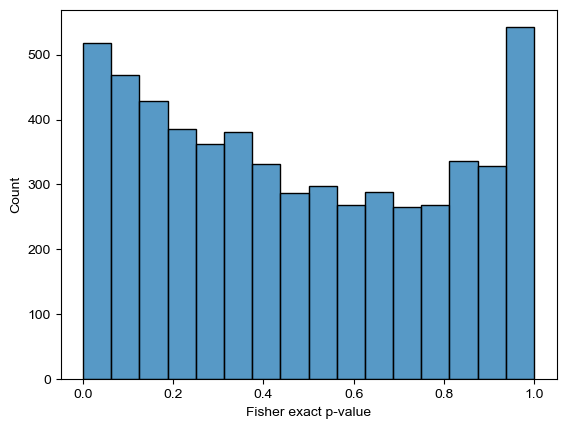

In [13]:
sns.histplot(vs["Fisher exact p-value"])

In [20]:

vs = pd.read_csv("Windows_Temp_Test_PerGene.csv")
vs["Gene"] = [x.split(";")[0] for x in list(vs["0"])]

#v = v[~v["Gene"].isin(["NEO1"])]
from scipy.stats import wilcoxon
from scipy.stats import ttest_rel
out = []
for key in d_HPO.keys():
    vk = vs[vs["Gene"].isin(d_HPO[key])]
    if len(vk.index) >= 15 and len(vk.index) <= 100:
        out.append([key, len(vk.index), combine_pvalues(vk["1"], method = "fisher")[1]])
df = pd.DataFrame(out)
df["FDR"] = fdrcorrection(df[2])[1]
df.sort_values(2).head(50)

,0,1,2,FDR
681,Malar flattening,74,0.000004,0.003259
58,Limitation of joint mobility,40,0.000009,0.004147
73,Cognitive impairment,95,0.000073,0.013757
27,Abnormality of cardiovascular system morphology,92,0.000089,0.013757
252,Thin skin,41,0.000098,0.013757
246,Photophobia,86,0.000112,0.013757
67,Bilateral single transverse palmar creases,34,0.000112,0.013757
558,Cirrhosis,40,0.000121,0.013757
629,Hemiparesis,32,0.000135,0.013757
695,Hyperextensible skin,27,0.000188,0.014034


In [43]:
vss = vs[vs["Gene"].isin(d_BP["Neuron Projection Guidance (GO:0097485)"])].set_index("Gene")
vss2 = vs2[vs2["Gene"].isin(d_BP["Neuron Projection Guidance (GO:0097485)"])].set_index("Gene")

vss2.columns = [x + " DL" for x in vss2.columns]
vss = vss.join(vss2).dropna()
from scipy.stats import pearsonr,spearmanr
pearsonr(-np.log10(vss["Fisher exact p-value"]), -np.log10(vss["Fisher exact p-value DL"]))

PearsonRResult(statistic=0.1254851507500878, pvalue=0.30424008450544365)

In [54]:
vs3

,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,alpha,Number crosses,Crosses,Tag,"[[dc, pc], [du, pu]]",FDR
Gene,,,,,,,,,,,
NRCAM,0.1180,346,0.0490,136,0.000818,0.471829,1.414828,"[1.3664729458917826, 4.1710460921843655, 5.283...","dc > 0.1, likely stable","[[54, 292], [7, 129]]",0.437530
NGF,0.0850,510,0.1260,155,0.006041,0.605355,2.394350,"[2.3278096192384794, 13.107400000000002]","dc < 0.1, may be unstable","[[38, 472], [3, 152]]",0.480954
KLF7,0.1695,518,0.1840,211,0.020294,0.254354,1.780325,"[1.728861322645292, 2.9639811623246484, 3.6844...","dc > 0.1, likely stable","[[71, 447], [17, 194]]",0.587464
FGFR2,-0.1040,941,-0.2370,300,0.043397,0.176956,-0.044851,"[-0.10903246492986085, 4.961279358717434, 6.11...","dc > 0.1, likely stable","[[441, 500], [123, 177]]",0.669455
BTBD3,0.0350,1687,0.0190,423,0.047698,0.173812,0.778647,"[0.7254276553106216, 3.226750701402807, 4.3975...","dc > 0.1, likely stable","[[346, 1341], [71, 352]]",0.669455
...,...,...,...,...,...,...,...,...,...,...,...
PAX2,0.3390,306,0.3560,95,0.925184,-0.418254,2.638842,"[1.351823647294589, 2.591174348697395, 3.06784...","dc > 0.1, likely stable","[[36, 270], [16, 79]]",0.982145
TRIO,-0.1095,798,-0.0100,141,0.956729,-0.166863,-0.017407,"[0.4257675350701433, 10.231]","dc > 0.1, likely stable","[[343, 455], [71, 70]]",0.993682
EPHA4,0.0375,3000,-0.0035,692,0.983502,-0.743370,4.026632,"[2.014776352705411, 3.9572581162324667, 5.0672...","dc < 0.1, may be unstable","[[54, 2946], [21, 671]]",0.998881


In [72]:
vss3 = vs2[vs2["Gene"].isin(d_BP["Axon Guidance (GO:0007411)"])]
vss3.head(50)

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,alpha,Number crosses,Crosses,Tag,"[[dc, pc], [du, pu]]",FDR
38,CNTN6,0.200016,164,0.214649,40,0.025004,0.696907,0.336220,"[0.3302727567294588, 0.6930768861703405, 0.758...","dc > 0.1, likely stable","[[36, 128], [3, 37]]",0.506192
50,SEMA6A,0.176296,254,0.155454,71,0.033567,0.396154,0.212499,"[0.20925843486372742, 0.724494053543086, 0.828...","dc > 0.1, likely stable","[[100, 154], [19, 52]]",0.521837
61,PLXNA4,0.157380,186,0.156591,41,0.040416,0.545750,0.221665,"[0.2192215137715431, 0.35118671636873744, 0.38...","dc > 0.1, likely stable","[[54, 132], [6, 35]]",0.525410
86,NFIB,0.178701,107,0.140209,31,0.062709,0.605039,0.188505,"[0.18506518024849702, 1.571362798]","dc > 0.1, likely stable","[[46, 61], [8, 23]]",0.580959
95,EPHB1,0.176074,115,0.160039,37,0.073626,0.383272,0.233819,"[0.23050163794789574, 0.5390502776492985, 0.67...","dc > 0.1, likely stable","[[38, 77], [7, 30]]",0.598453
105,LRTM1,0.168864,140,0.154030,43,0.083012,0.471120,0.208798,"[0.20526255947094182, 0.4527486486092184, 0.62...","dc > 0.1, likely stable","[[54, 86], [11, 32]]",0.598453
180,EPHA5,0.187137,153,0.152634,38,0.142809,0.293930,0.374084,"[0.273798223511022, 0.37084876483366735, 0.694...","dc > 0.1, likely stable","[[25, 128], [3, 35]]",0.629079
267,NRXN1,0.188753,335,0.180133,92,0.221072,0.222045,0.334467,"[0.3307931865891784, 1.0214801132665332, 1.150...","dc > 0.1, likely stable","[[73, 262], [16, 76]]",0.664865
283,ROBO2,0.164215,206,0.185653,69,0.237560,0.276763,0.347841,"[0.34547556727054113, 0.39515656750300604, 0.4...","dc > 0.1, likely stable","[[30, 176], [7, 62]]",0.671899
297,EFNA5,0.173428,283,0.161101,84,0.252062,0.107905,0.273542,"[0.27006122701402807, 0.43713414981963933, 0.5...","dc > 0.1, likely stable","[[66, 217], [16, 68]]",0.677960


In [ ]:
d_LDL = {}

In [12]:
#Top hit NEO1 has a lot of signal from what is probably a HAR around chr15:72932789-72933088
#It has specifically increased expression in astrocytes (where it plays an important role) as it has decreased or similar expression in other cell types
#Though the aforementioned CRE was not called as a peak in astrocytes in CATlas
#However, another locus with lots of human-derived mutations chr15:72,971,468-72,972,367 is a cCRE in many cell types including astrocytes

#Axon guidance is top (slightly too many genes for PhastConsCut-1) for both!
#Also at the top for SpecSup 400 and PhastConsCut-1!
#Somatic mutation is also near the top for both in BP!
vs = pd.read_csv("Finalizing_PerGene_NoPseudos_FisherExact_NonCod_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut-1.csv")
vs2 = pd.read_csv("Finalizing_PerGene_AbsLogfc_DLMicroglia_Top20th_FisherExact_NonCod_MAFCut0.25_SpecSup0_PhyloPCut-100_PhastConsCut-1.csv")
vs3 = pd.read_csv("Finalizing_PerGene_CNEP_NoPseudosNoRepeats_FisherExact_NonCod_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut-1.csv")
#v = v[~v["Gene"].isin(["NEO1"])]
from scipy.stats import wilcoxon
from scipy.stats import ttest_rel
out = []
for key in d_LDL.keys():
    vk = vs2[vs2["Gene"].isin(d_LDL[key])]
    if len(vk.index) >= 15 and len(vk.index) <= 125:
        out.append([key, len(vk.index), combine_pvalues(vk["Fisher exact p-value"], method = "fisher")[1], wilcoxon(vk["Median Fixed PhyloP"], vk["Median Polymorphic PhyloP"], alternative = "greater")[1], np.log2((np.median(vk["Median Fixed PhyloP"]))/(np.median(vk["Median Polymorphic PhyloP"])))])
df = pd.DataFrame(out)
df["FDR"] = fdrcorrection(df[2])[1]
df.sort_values(2).head(50)

,0,1,2,3,4,FDR
0,LDL,12,0.931113,0.924316,-0.111851,0.931113


In [21]:
df.sort_values(2).head(50)

,0,1,2,3,4,FDR
149,Thrombocytopenia,75,0.000003,0.007460,0.067429,0.001909
440,Bruising susceptibility,44,0.000046,0.031980,0.103063,0.016396
467,Preauricular skin tag,21,0.000096,0.341357,-0.061693,0.017755
546,Cranial nerve paralysis,23,0.000114,0.089667,0.134314,0.017755
158,Anemia,74,0.000125,0.032509,0.105581,0.017755
495,Epistaxis,27,0.000193,0.052813,0.120083,0.022860
223,Hyperlordosis,32,0.000258,0.015461,0.098810,0.026183
46,Broad thumb,27,0.000324,0.322291,0.010222,0.028752
178,Inguinal hernia,69,0.000420,0.574694,-0.026243,0.033148
601,Pancytopenia,21,0.000739,0.078567,0.087565,0.048358


In [36]:
vs = pd.read_csv("Finalizing_PerGene_NeuronDL_dncut0.001_StartComp0.25_cCRE20Percent_New447_FisherExact_NonCod_MafCut0.25_SpecSup0_PhyloPCut-100_PhastConsCut-1.csv")
vs

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,alpha,Cutoff,Crosses,Tag,"[[dc, pc], [du, pu]]",FDR
0,CELF4,0.027476,2140,0.026004,631,0.000459,0.629335,0.297655,"[163, 243, 250, 284, 294, 500]","dc < 0.1, may be unstable","[[87, 2053], [9, 622]]",0.975639
1,PCDH10,0.031588,856,0.034115,320,0.000591,0.734904,0.338691,"[152, 175, 190, 500]","dc < 0.1, may be unstable","[[46, 810], [4, 316]]",0.975639
2,MPDZ,0.026860,599,0.026750,200,0.001335,0.734824,0.307985,"[124, 130, 500]","dc < 0.1, may be unstable","[[36, 563], [2, 198]]",0.975639
3,MROH5,0.031671,1115,0.031819,339,0.001613,0.941120,0.351032,"[137, 500]","dc < 0.1, may be unstable","[[24, 1091], [0, 339]]",0.975639
4,LOC643355,0.026662,177,0.029385,97,0.001822,0.980686,0.258567,"[135, 500]","dc < 0.1, may be unstable","[[14, 163], [0, 97]]",0.975639
...,...,...,...,...,...,...,...,...,...,...,...,...
5343,CD40,0.028901,179,0.032474,60,1.000000,0.483066,0.383827,"[381, 438, 500]","dc < 0.1, may be unstable","[[0, 179], [0, 60]]",1.000000
5344,COL2A1,0.024880,64,0.034666,42,1.000000,-1825.546879,0.249710,[500],"dc < 0.1, may be unstable","[[0, 64], [1, 41]]",1.000000
5345,MFAP2,0.025301,98,0.025552,34,1.000000,0.183746,0.249511,[500],"dc < 0.1, may be unstable","[[0, 98], [0, 34]]",1.000000
5346,PLEKHA6,0.029770,153,0.025947,55,1.000000,0.228325,0.498098,"[257, 434, 500]","dc < 0.1, may be unstable","[[0, 153], [0, 55]]",1.000000


In [37]:
np.median(vs["Fisher exact p-value"])

0.5286514086334098

In [8]:
for index, row in df.iterrows():
    if "Axon" in row[0]:
        print(row)

0      Anterograde Axonal Transport (GO:0008089)
1                                             21
2                                       0.735484
3                                       0.904333
4                                       -0.91427
FDR                                     0.775673
Name: 97, dtype: object
0      Axon Development (GO:0061564)
1                                 69
2                           0.228398
3                           0.984258
4                                0.0
FDR                         0.403164
Name: 115, dtype: object
0      Axon Extension (GO:0048675)
1                               15
2                         0.358568
3                          0.87381
4                        -2.201634
FDR                       0.500132
Name: 116, dtype: object
0      Axon Guidance (GO:0007411)
1                             114
2                        0.082219
3                        0.999902
4                             NaN
FDR                       0.25

In [79]:
df_phylop = df.copy().set_index(0).sort_values(2)
df_phylop.columns = [str(x) + " P" for x in df_phylop.columns]

In [80]:
df_phylop

,1 P,2 P,3 P,4 P,FDR P
0,,,,,
Negative Regulation Of Cellular Process (GO:0048523),249,3.934878e-12,0.309480,-0.748461,5.390783e-09
Regulation Of Nucleic Acid-Templated Transcription (GO:1903506),177,1.002300e-11,0.036546,2.321928,6.865758e-09
Regulation Of Cell Migration (GO:0030334),241,2.171397e-11,0.171252,-1.874469,9.916047e-09
Negative Regulation Of Cell Population Proliferation (GO:0008285),196,3.169414e-10,0.100789,-1.321928,1.085524e-07
Positive Regulation Of Nucleic Acid-Templated Transcription (GO:1903508),266,9.389895e-10,0.273134,NaN,2.572831e-07
...,...,...,...,...,...
Positive Regulation Of Phosphatidylinositol 3-Kinase Activity (GO:0043552),16,8.778483e-01,0.947708,-1.447459,8.804189e-01
Cell Chemotaxis (GO:0060326),24,8.816815e-01,0.890891,NaN,8.836164e-01
Secondary Alcohol Metabolic Process (GO:1902652),16,8.974814e-01,0.941666,1.044897,8.987935e-01


In [77]:
df_chrom = df.copy().set_index(0).sort_values(2)
df_chrom.columns = [str(x) + " NDL" for x in df_chrom.columns]

In [83]:
x = df_chrom.join(df_phylop).dropna()
x = x[x["1 NDL"] > 75]

PearsonRResult(statistic=0.06479694816761168, pvalue=0.5509940802745109)


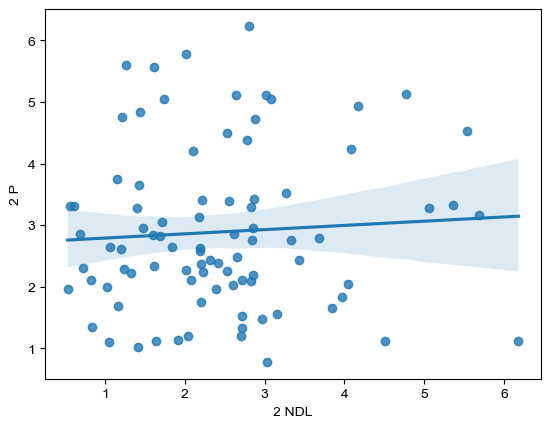

In [87]:
x = df_chrom.join(df_phylop).dropna()
x = x[(x["1 NDL"] > 50) & (x["1 NDL"] < 100)]
sns.regplot(x= -np.log10(x["2 NDL"]), y = -np.log10(x["2 P"]))
print(pearsonr(-np.log10(x["2 NDL"]), -np.log10(x["2 P"])))

In [47]:
df.sort_values(2).set_index(0).head(50)

,1,2,3,4,FDR
0,,,,,
Cryptorchidism,196,3.773170e-08,0.022100,0.012703,0.000028
Depressed nasal bridge,152,9.831783e-07,0.051189,0.006304,0.000185
Cerebellar atrophy,76,9.935372e-07,0.027379,0.017219,0.000185
High palate,132,1.005572e-06,0.092726,0.022404,0.000185
Hearing impairment,175,2.959211e-06,0.003071,0.023275,0.000436
Pes cavus,73,5.235421e-06,0.184366,0.018223,0.000568
Talipes equinovarus,88,5.397487e-06,0.246186,0.012652,0.000568
Micrognathia,169,2.403664e-05,0.054931,0.008727,0.002041
Frontal bossing,100,2.812284e-05,0.055313,0.024825,0.002041


In [28]:
vs.head(50)

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,alpha,Cutoff,Crosses,Tag,"[[dc, pc], [du, pu]]",FDR
0,SDR42E1,0.032297,129,0.016476,49,0.000015,0.960930,0.098385,[500],"dc > 0.1, likely stable","[[31, 98], [0, 49]]",0.078250
1,PLK1S1,0.032210,321,0.029132,98,0.000135,0.926231,0.161534,"[103, 110, 500]","dc < 0.1, may be unstable","[[32, 289], [0, 98]]",0.361594
2,IL12B,0.034476,375,0.018995,85,0.000267,0.852203,0.173122,"[112, 123, 500]","dc > 0.1, likely stable","[[49, 326], [1, 84]]",0.417697
3,CXCR4,0.028868,426,0.023661,127,0.000312,0.930333,0.216907,"[137, 160, 500]","dc < 0.1, may be unstable","[[30, 396], [0, 127]]",0.417697
4,PCDH10,0.031588,856,0.034115,320,0.000591,0.734904,0.338691,"[119, 152, 175, 190, 500]","dc < 0.1, may be unstable","[[46, 810], [4, 316]]",0.607722
5,LHX5,0.030791,246,0.030481,128,0.000747,0.601349,0.106683,"[114, 282, 308, 500]","dc > 0.1, likely stable","[[48, 198], [9, 119]]",0.607722
6,LITAF,0.032479,138,0.027331,55,0.000796,0.970365,0.157058,"[156, 179, 500]","dc > 0.1, likely stable","[[20, 118], [0, 55]]",0.607722
7,NRCAM,0.028310,176,0.023632,73,0.000908,0.905719,0.099116,[500],"dc > 0.1, likely stable","[[25, 151], [1, 72]]",0.607722
8,LMX1B,0.029657,397,0.030885,168,0.001550,0.902034,0.219335,"[216, 500]","dc < 0.1, may be unstable","[[18, 379], [0, 168]]",0.750330
9,MROH5,0.031671,1115,0.031819,339,0.001613,0.941120,0.351032,"[104, 137, 500]","dc < 0.1, may be unstable","[[24, 1091], [0, 339]]",0.750330


In [17]:
vs[vs["Gene"].isin(d_BP['Axon Guidance (GO:0007411)'])].head(25)

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,alpha,Cutoff,Crosses,Tag,"[[dc, pc], [du, pu]]",FDR
6,NRCAM,0.028310,176,0.023632,73,0.000908,0.905719,0.099116,[500],"dc > 0.1, likely stable","[[25, 151], [1, 72]]",0.692463
35,NELL1,0.035054,534,0.024198,170,0.006868,0.609613,0.214524,"[125, 139, 325, 377, 500]","dc < 0.1, may be unstable","[[41, 493], [4, 166]]",0.809369
37,CNTN6,0.028556,798,0.025941,232,0.007219,0.685599,0.328407,"[108, 124, 158, 164, 185, 192, 500]","dc < 0.1, may be unstable","[[39, 759], [3, 229]]",0.809369
78,NRXN3,0.029035,1065,0.027551,264,0.013284,0.303202,0.108943,"[105, 153, 174, 204, 238, 348, 388, 500]","dc > 0.1, likely stable","[[172, 893], [28, 236]]",0.809369
98,KLF7,0.028182,287,0.030786,93,0.017036,0.525156,0.132878,"[169, 266, 285, 302, 330, 500]","dc > 0.1, likely stable","[[44, 243], [6, 87]]",0.809369
139,EMB,0.037304,125,0.026097,34,0.022327,0.975182,0.278108,"[173, 186, 500]","dc > 0.1, likely stable","[[15, 110], [0, 34]]",0.809369
237,NFIB,0.028737,672,0.029595,235,0.038182,0.461749,0.155242,"[107, 113, 136, 144, 500]","dc < 0.1, may be unstable","[[60, 612], [12, 223]]",0.809369
307,NEO1,0.029898,181,0.028221,58,0.047261,0.480073,0.108954,"[126, 282, 500]","dc > 0.1, likely stable","[[38, 143], [6, 52]]",0.809369
346,SEMA3A,0.024111,299,0.027009,119,0.053361,0.390341,0.203377,"[120, 167, 179, 267, 286, 380, 500]","dc < 0.1, may be unstable","[[28, 271], [5, 114]]",0.811619
355,UNC5C,0.029318,517,0.025566,140,0.054844,0.982027,0.380486,"[169, 181, 500]","dc < 0.1, may be unstable","[[12, 505], [0, 140]]",0.811619


In [27]:
vs.columns = [x + " NDL" for x in vs.columns]
vs2.columns = [x + " P" for x in vs2.columns]
vs = vs.set_index("Gene NDL").join(vs2.set_index("Gene P")).dropna()

SignificanceResult(statistic=0.0035112648829371566, pvalue=0.7982126882779708)


<Axes: xlabel='Fisher exact p-value P', ylabel='Fisher exact p-value NDL'>

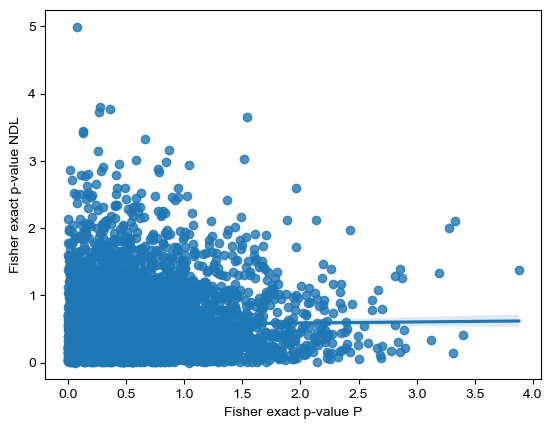

In [32]:
from scipy.stats import pearsonr,spearmanr
print(pearsonr(-np.log10(vs["Fisher exact p-value P"]), -np.log10(vs["Fisher exact p-value NDL"])))
sns.regplot(x=-np.log10(vs["Fisher exact p-value P"]), y=-np.log10(vs["Fisher exact p-value NDL"]))


In [37]:
fisher_exact([[49, 413], [408, 4434]])

SignificanceResult(statistic=1.28938185443669, pvalue=0.11790218840018905)

In [45]:
fisher_exact([[155, 756], [691, 3702]])

SignificanceResult(statistic=1.0984195897365217, pvalue=0.34484686885689086)

In [44]:
vs[(vs["Fisher exact p-value P"] < 0.1) & (vs["Fisher exact p-value NDL"] >= 0.1)]

,Median Fixed PhyloP NDL,Number Fixed Variants NDL,Median Polymorphic PhyloP NDL,Number Polymorphic Variants NDL,Fisher exact p-value NDL,alpha NDL,Cutoff NDL,Crosses NDL,Tag NDL,"[[dc, pc], [du, pu]] NDL",...,Number Fixed Variants P,Median Polymorphic PhyloP P,Number Polymorphic Variants P,Fisher exact p-value P,alpha P,Number crosses P,Crosses P,Tag P,"[[dc, pc], [du, pu]] P",FDR P
Gene NDL,,,,,,,,,,,,,,,,,,,,,
SYCE1L,0.083364,135,0.084144,68,0.100060,0.447563,0.117555,"[87, 114, 120, 157, 173, 500]","dc > 0.1, likely stable","[[45, 90], [16, 52]]",...,336.0,-0.1040,144.0,0.066073,0.381150,1.035600,"[346, 500]","dc > 0.1, likely stable","[[43, 293], [11, 133]]",0.580213
SLC5A4,0.087075,56,0.062256,32,0.100108,0.692259,0.099534,"[95, 239, 299, 500]","dc > 0.1, likely stable","[[19, 37], [6, 26]]",...,132.0,-0.0925,42.0,0.078912,0.343286,0.096273,"[307, 359, 384, 423, 432, 500]","dc > 0.1, likely stable","[[72, 60], [17, 25]]",0.595513
STAU2,0.091946,186,0.081349,45,0.100657,0.397604,0.114092,"[93, 189, 223, 500]","dc > 0.1, likely stable","[[71, 115], [12, 33]]",...,460.0,0.1080,124.0,0.036125,0.231739,0.844528,"[276, 310, 344, 500]","dc > 0.1, likely stable","[[98, 362], [17, 107]]",0.547054
RFX3,0.084613,678,0.085124,175,0.100963,0.212471,0.126858,"[94, 134, 141, 157, 195, 278, 304, 500]","dc > 0.1, likely stable","[[198, 480], [42, 133]]",...,2245.0,0.0950,480.0,0.051608,0.250286,1.001355,"[276, 331, 335, 500]","dc > 0.1, likely stable","[[404, 1841], [71, 409]]",0.572639
C1orf105,0.090987,174,0.084360,77,0.102133,0.391719,0.139624,"[96, 117, 137, 298, 336, 500]","dc > 0.1, likely stable","[[41, 133], [12, 65]]",...,608.0,0.0560,195.0,0.033503,0.196755,0.485076,"[235, 500]","dc > 0.1, likely stable","[[210, 398], [53, 142]]",0.547054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAM,0.083340,201,0.104662,77,0.987072,-0.729060,0.102863,"[122, 384, 500]","dc > 0.1, likely stable","[[74, 127], [39, 38]]",...,816.0,0.0825,238.0,0.023830,0.243335,1.284310,"[285, 359, 366, 500]","dc > 0.1, likely stable","[[121, 695], [23, 215]]",0.533456
SPEF2,0.080719,252,0.094513,79,0.988443,-1.526898,0.267764,"[125, 186, 203, 322, 500]","dc < 0.1, may be unstable","[[16, 236], [11, 68]]",...,546.0,-0.1240,201.0,0.019961,0.213003,0.233056,"[297, 355, 380, 500]","dc > 0.1, likely stable","[[180, 366], [50, 151]]",0.531409
ADAM23,0.078466,137,0.103898,35,0.993662,-4.917594,0.443061,"[98, 189, 207, 233, 269, 500]","dc < 0.1, may be unstable","[[2, 135], [3, 32]]",...,381.0,0.0210,72.0,0.033310,0.356167,0.456220,"[302, 353, 360, 500]","dc > 0.1, likely stable","[[105, 276], [12, 60]]",0.547054


In [116]:
#Reading non-coding data
v = pd.read_csv("HumChp_NC_Final_Rmdup_CREs_NoHLA.bed", sep = "\t")
v = v.drop(["InPromoter", "NextNearest", "NextNearestDist", "MskHBCGOPhyloP", "ENCODEname", "ENCODEtype"], axis = 1)
vv = pd.read_csv("HumPoly_NC_Final_CREs_NoHLA.bed", sep = "\t")
vv = vv.drop(["InPromoter", "NextNearest", "NextNearestDist", "MskHBCGOPhyloP", "ENCODEname", "ENCODEtype"], axis = 1)
vv = vv.drop_duplicates("Position")
v = v[~v["Position"].isin(list(vv["Position"]))]

#Add the 447-way information
v.index = v["Position"]
vv.index = vv["Position"]

p447 = pd.read_csv("447/HumChp_NC_Final_Rmdup_CREs_NoHLA_NewPhyloP447.txt", sep = "\t").set_index("Position")
v = v.join(p447)
v = v.drop_duplicates("Position")

p447 = pd.read_csv("447/HumPoly_NC_Final_CREs_NoHLA_NewPhyloP447.txt", sep = "\t").set_index("Position")
vv = vv.join(p447)
vv = vv.drop_duplicates("Position")

#Important parameters
maf_cut = 0.25
spec_sup = 250
phylop_cut = -100
pc = -1
dist = 500000

print(v.shape)

#Only keep if we have the essential columns for this analysis
v = v.dropna(subset = ["SpecSup447", "PhyloP447", "Position", "NearestGene", "NearestDist"])
vv = vv.dropna(subset = ["SpecSup447", "PhyloP447", "Position", "NearestGene", "NearestDist"])

#v = v[v["SpecSup447New"] != "."]
#vv = vv[vv["SpecSup447New"] != "."]

v = v[v["SpecSup447"] != "."]
vv = vv[vv["SpecSup447"] != "."]

print(v.shape)

v = v[v["PhyloP447"] != "."]
vv = vv[vv["PhyloP447"] != "."]

v["PhyloP447"] = v["PhyloP447"].astype(float)
vv["PhyloP447"] = vv["PhyloP447"].astype(float)

v = v[v["PhastCons447"] != "."]
vv = vv[vv["PhastCons447"] != "."]

v = v[v['PhastCons447'].astype(float) > pc]
vv = vv[vv['PhastCons447'].astype(float) > pc]

print(v.shape)

#v = v[v['SpecSup447New'].astype(int) > spec_sup]
#vv = vv[vv['SpecSup447New'].astype(int) > spec_sup]

v = v[v['SpecSup447'].astype(int) > spec_sup]
vv = vv[vv['SpecSup447'].astype(int) > spec_sup]


print(v.shape)

v = v[v['PhyloP447'].astype(float) >= phylop_cut]
vv = vv[vv['PhyloP447'].astype(float) >= phylop_cut]

v = v[v['NearestDist'].astype(float) <= dist]
vv = vv[vv['NearestDist'].astype(float) <= dist]

print(v.shape)

#v = v[v["PhyloP447"] != 0]
#vv = vv[vv["PhyloP447"] != 0]

yvalls = vv[vv["MAFMaxAcrossAncestry"] >= maf_cut]
yvalls = yvalls[yvalls["MAFMaxAcrossAncestry"] <= 1-maf_cut]

v.index = v["NearestGene"]
yvalls.index = yvalls["NearestGene"]


v = v.drop_duplicates("Position")
yvalls = yvalls.drop_duplicates("Position")


C:\Users\astar\AppData\Local\Temp\ipykernel_5052\3643111973.py:2: DtypeWarning: Columns (5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  v = pd.read_csv("HumChp_NC_Final_Rmdup_CREs_NoHLA.bed", sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_5052\3643111973.py:4: DtypeWarning: Columns (6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  vv = pd.read_csv("HumPoly_NC_Final_CREs_NoHLA.bed", sep = "\t")
C:\Users\astar\AppData\Local\Temp\ipykernel_5052\3643111973.py:13: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p447 = pd.read_csv("447/HumChp_NC_Final_Rmdup_CREs_NoHLA_NewPhyloP447.txt", sep = "\t").set_index("Position")
C:\Users\astar\AppData\Local\Temp\ipykernel_5052\3643111973.py:17: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  p447 = pd.read_csv("447/HumPoly_NC_Final_CREs_NoHLA_NewPhyloP447.txt

(10766097, 10)
(10700553, 10)
(10700553, 10)
(5626024, 10)
(4884154, 10)


In [115]:
v

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,alpha,Number crosses,Crosses,Tag,"[[dc, pc], [du, pu]]",FDR
0,CTHRC1,0.1705,88,-0.4175,30,0.000117,0.818484,-0.365036,"[260, 500]","dc > 0.1, likely stable","[[76, 12], [15, 15]]",0.352976
1,SNAP91,0.1260,369,-0.1895,50,0.000124,0.564112,-0.133253,"[216, 267, 290, 500]","dc > 0.1, likely stable","[[258, 111], [21, 29]]",0.352976
2,NEO1,0.1310,626,0.1120,164,0.000132,0.707633,1.983953,"[259, 285, 500]","dc > 0.1, likely stable","[[63, 563], [3, 161]]",0.352976
3,PDP1,0.1240,381,-0.0640,129,0.000401,0.513153,0.383844,"[318, 500]","dc > 0.1, likely stable","[[138, 243], [26, 103]]",0.468813
4,SPANXF1,0.1110,173,-0.1655,38,0.000402,0.669222,0.251768,"[285, 500]","dc > 0.1, likely stable","[[67, 106], [4, 34]]",0.468813
...,...,...,...,...,...,...,...,...,...,...,...,...
8011,FAM83C,0.0940,127,0.9950,33,0.999869,-2.359393,0.953434,[500],"dc > 0.1, likely stable","[[29, 98], [18, 15]]",1.000000
8012,AMPD3,0.1340,205,0.5190,65,0.999877,-0.887002,0.518267,"[281, 414, 500]","dc > 0.1, likely stable","[[55, 150], [33, 32]]",1.000000
8013,RAD18,-0.0230,681,0.2245,176,0.999986,-0.550573,0.201844,"[285, 412, 500]","dc > 0.1, likely stable","[[236, 445], [91, 85]]",1.000000
8014,KRT74,-0.1040,71,0.0240,39,1.000000,0.418772,2.531806,"[378, 431, 500]","dc < 0.1, may be unstable","[[0, 71], [0, 39]]",1.000000


In [127]:
vk

,Position,NearestGene,NearestDist,MskHumPhyloP,SpeciesSupport,470MammalPhastCons,ENCODE,PhyloP447,PhastCons447,SpecSup447,FixedOrPoly,MAFMaxAcrossAncestry
NearestGene,,,,,,,,,,,,
CNTFR,chr9:34557793,CNTFR,32146,-0.185,231,0.065,1,-0.772,0.119,422,Fixed,.
CNTFR,chr9:34566508,CNTFR,23432,-0.431,236,0,1,-0.253,0.143,399,Fixed,.
CNTFR,chr9:34568940,CNTFR,21000,-0.379,240,0.014,1,-0.175,0.887,443,Fixed,.
CNTFR,chr9:34560931,CNTFR,29008,-0.259,240,0,0,-0.130,0.483,442,Fixed,.
CNTFR,chr9:34567414,CNTFR,22526,-0.066,231,0,0,-0.067,0.007,435,Fixed,.
CNTFR,chr9:34560822,CNTFR,29118,-0.087,206,0.53,1,0.017,0.96,409,Fixed,.
CNTFR,chr9:34566353,CNTFR,23586,0.5,237,0.032,0,0.204,0.002,439,Fixed,.
CNTFR,chr9:34585837,CNTFR,4102,0.308,224,0.06,0,0.283,0.991,426,Fixed,.
CNTFR,chr9:34590807,CNTFR,0,0.146,238,0.111,1,0.324,0.693,441,Fixed,.


(0.7471694048673065, 1.6538625250501005, [148, 500], 'dc > 0.1, likely stable')


SignificanceResult(statistic=3.888888888888889, pvalue=0.021723090726646875)

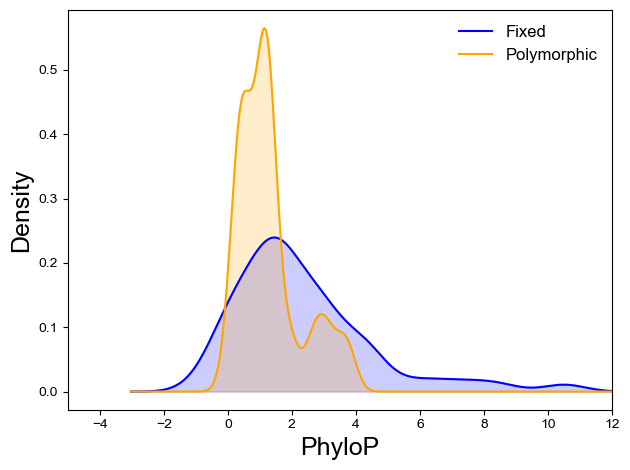

In [126]:
vk = v[v["NearestGene"].isin(["CNTFR"])].sort_values("PhyloP447")
vvk = yvalls[yvalls["NearestGene"].isin(["CNTFR"])].sort_values("PhyloP447")
pc = 0
vk = vk[vk['PhastCons447'].astype(float) > pc]
vvk = vvk[vvk['PhastCons447'].astype(float) > pc]

vvv = prepare_alpha(vk, vvk, stat = "PhyloP447")
alpha = compute_alpha_new(vvv, plot = True, dn_cut = 0.01)
x2 = [np.float64(x) for x in list(vk["PhyloP447"])]
yvals2 = [np.float64(j) for j in list(vvk["PhyloP447"])]

table = [[len(np.where(np.array(x2) >= alpha[1])[0]), len(x2)-len(np.where(np.array(x2) >= alpha[1])[0])], [len(np.where(np.array(yvals2) >= alpha[1])[0]), len(yvals2)-len(np.where(np.array(yvals2) >= alpha[1])[0])]]

#mwu(vk["PhyloP447"].astype(float), vvk["PhyloP447"].astype(float), alternative = "greater")
print(alpha)
fisher_exact(table, alternative = "greater")

In [125]:
vk.sort_values("PhyloP447", ascending = False)

,Position,NearestGene,NearestDist,MskHumPhyloP,SpeciesSupport,470MammalPhastCons,ENCODE,PhyloP447,PhastCons447,SpecSup447,FixedOrPoly,MAFMaxAcrossAncestry
NearestGene,,,,,,,,,,,,
NGF,chr1:115306071,NGF,32173,7.064000,239,1,0,8.364,1.000000,443,Fixed,.
NGF,chr1:115482597,NGF,144353,4.871000,235,0.989,0,5.749,1.000000,414,Fixed,.
NGF,chr1:115226468,NGF,111776,4.857000,240,1,0,5.708,1.000000,445,Fixed,.
NGF,chr1:115285889,NGF,52355,0.000000,239,0.984,0,5.661,0.415000,440,Fixed,.
NGF,chr1:115233915,NGF,104329,4.460000,232,1,1,5.400,1.000000,432,Fixed,.
...,...,...,...,...,...,...,...,...,...,...,...,...
NGF,chr1:115476795,NGF,138551,0.859000,239,0,1,-0.179,0.249000,342,Fixed,.
NGF,chr1:115476804,NGF,138560,0.388000,239,0,1,-0.197,0.001000,343,Fixed,.
NGF,chr1:115218140,NGF,120104,-0.705000,240,0,0,-0.423,0.283000,439,Fixed,.


In [72]:
v = pd.read_csv("Finalizing_PerGene_New447_FisherExact_NonCod_MafCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut0.csv")
out = []
keep_terms = list(df[df["FDR"] < 0.25][0])
for key in d_BP.keys():
    vk = v[v["Gene"].isin(d_BP[key])]
    if key in keep_terms:
        out.append([key, len(vk.index), combine_pvalues(vk["MWU p-value"])[1], wilcoxon(vk["Median Fixed PhyloP"], vk["Median Polymorphic PhyloP"], alternative = "greater")[1], np.log2((np.median(vk["Median Fixed PhyloP"]))/(np.median(vk["Median Polymorphic PhyloP"])))])
df = pd.DataFrame(out)
df["FDR"] = fdrcorrection(df[2])[1]
df.sort_values(2).head(50)
overall_keep = np.intersect1d(keep_terms, df[df[2] < 0.05][0])
overall_keep

C:\Users\astar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
C:\Users\astar\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\astar\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


array(['Amide Biosynthetic Process (GO:0043604)',
       'Anterograde Trans-Synaptic Signaling (GO:0098916)',
       'Antigen Receptor-Mediated Signaling Pathway (GO:0050851)',
       'Axon Development (GO:0061564)', 'Axon Guidance (GO:0007411)',
       'Axonogenesis (GO:0007409)', 'Brain Development (GO:0007420)',
       'Branching Morphogenesis Of An Epithelial Tube (GO:0048754)',
       'Calcium Ion Transmembrane Transport (GO:0070588)',
       'Calcium Ion Transport (GO:0006816)',
       'Calcium-Dependent Cell-Cell Adhesion Via Plasma Membrane Cell Adhesion Molecules (GO:0016339)',
       'Cell Junction Assembly (GO:0034329)',
       'Cell Junction Organization (GO:0034330)',
       'Cell Morphogenesis Involved In Neuron Differentiation (GO:0048667)',
       'Cell-Cell Adhesion Via Plasma-Membrane Adhesion Molecules (GO:0098742)',
       'Cellular Component Assembly (GO:0022607)',
       'Cellular Respiration (GO:0045333)',
       'Cellular Response To Chemical Stress (GO:0062197)

In [75]:
df.sort_values(2).set_index(0).loc["Heart Development (GO:0007507)"]

1      47.000000
2       0.024519
3       0.940381
4      -0.050092
FDR          NaN
Name: Heart Development (GO:0007507), dtype: float64

In [36]:
v = pd.read_csv("Finalizing_PerGene_New447_NonCod_MafCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut0.csv")
v[v["Gene"].isin(d_HPO['Hydroureter'])]


,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,MWU p-value,alpha,Number crosses,Crosses,FDR
24,MKKS,1.4640,35,0.6450,19,0.007237,0.736404,4,"[120, 178, 219, 500]",0.953376
282,SOX17,1.7960,69,1.1795,20,0.072867,0.472199,3,"[155, 385, 500]",0.999936
302,TP63,1.4490,189,1.0980,69,0.077765,0.336662,6,"[153, 220, 247, 355, 432, 500]",0.999936
362,SETBP1,1.6355,330,1.5530,61,0.097263,0.389237,6,"[117, 155, 161, 252, 405, 500]",0.999936
432,EDNRA,1.1925,100,0.8720,19,0.119942,0.482158,4,"[139, 191, 223, 500]",0.999936
539,CHRM3,1.4345,168,1.0780,31,0.145962,0.276233,5,"[186, 205, 256, 371, 500]",0.999936
790,BCOR,1.4270,226,1.2530,57,0.218325,0.211548,4,"[148, 337, 381, 500]",0.999936
1066,PLD1,1.2955,72,1.1775,28,0.294177,0.473755,5,"[99, 185, 342, 395, 500]",0.999936
1358,ERCC4,1.3400,225,1.1910,51,0.370215,0.360934,4,"[164, 253, 391, 500]",0.999936
1390,GPC3,1.4800,257,1.2820,20,0.379905,0.485566,5,"[95, 177, 247, 351, 500]",0.999936


In [49]:
df[df[0].isin(["Ventricular Septum Development (GO:0003281)"])]

,0,1,2,3,4,FDR
765,Ventricular Septum Development (GO:0003281),23,0.000564,0.094771,0.103852,0.20975


In [35]:
df.sort_values(2).head(50).loc[694][0]

'Positive Regulation Of T Cell Differentiation (GO:0045582)'

In [52]:
vk = v[v["Gene"].isin(d_BP["Circulatory System Development (GO:0072359)"])]
combine_pvalues(vk["MWU p-value"])


SignificanceResult(statistic=175.4640515075628, pvalue=0.0004749809310270638)

In [53]:
vk

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,MWU p-value,alpha,Number crosses,Crosses,FDR
1,CITED2,1.5705,342,0.9350,84,0.000565,0.506860,4,"[234, 336, 356, 500]",0.725812
6,SALL1,1.7910,306,0.9380,57,0.001448,0.552548,3,"[154, 352, 500]",0.725812
39,HEY1,1.5660,111,0.8960,31,0.006541,0.697692,2,"[204, 500]",0.725812
73,TEK,1.3370,82,0.6990,28,0.012312,0.588380,4,"[170, 345, 389, 500]",0.725812
81,SOX17,1.4970,85,1.0070,29,0.013365,0.537230,3,"[133, 388, 500]",0.725812
92,MEF2C,1.5970,569,1.3660,97,0.015216,0.311229,6,"[147, 168, 179, 315, 356, 500]",0.725812
101,MKKS,1.4640,42,0.7085,22,0.016117,0.611220,4,"[162, 212, 249, 500]",0.725812
117,SH3PXD2B,1.2580,78,0.4940,37,0.018877,0.575528,2,"[222, 500]",0.747782
123,NTRK3,1.4850,323,1.2800,50,0.020107,0.354647,6,"[145, 162, 195, 255, 278, 500]",0.759703
171,TAB2,1.3740,193,1.1580,85,0.029135,0.355091,6,"[153, 217, 241, 310, 342, 500]",0.793766


In [5]:
import numpy as np
from scipy.stats import wilcoxon

# Example gene expression data
gene_set = np.array([2.5, 3.6, 2.9, 3.1, 4.0])
background_set = np.array([1.2, 2.3, 2.1, 1.8, 2.0, 1.9, 2.2, 2.4, 2.5, 2.6])

# Perform the Wilcoxon signed-rank test
stat, p_value = wilcoxon(gene_set, background_set[:len(gene_set)])

print(f'Statistic: {stat}, p-value: {p_value}')

Statistic: 0.0, p-value: 0.0625


In [62]:
gene_set

array([2.5, 3.6, 2.9, 3.1, 4. ])

In [97]:
df.sort_values(2, ascending = True).head(500)

,0,1,2,3,FDR
302,"Intellectual disability, moderate",88,0.000123,0.103860,0.046599
20,Hydroureter,36,0.000145,0.276916,0.046599
256,Elevated hepatic transaminase,98,0.000255,0.342269,0.046599
115,Tall stature,42,0.000278,0.268302,0.046599
661,Increased circulating gonadotropin level,20,0.000354,0.317772,0.046599
...,...,...,...,...,...
620,Short thorax,26,0.308546,0.171879,0.478370
11,Abnormality of the metacarpal bones,23,0.311034,-0.083990,0.481258
474,Easy fatigability,29,0.311963,0.259352,0.481573
82,Delayed puberty,99,0.312736,0.012530,0.481573


In [42]:
from scipy.stats import binom_test
binom_test(160, 160 + 88, 5019/(3850 + 5019))

C:\Users\astar\AppData\Local\Temp\ipykernel_10140\736190160.py:2: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  binom_test(160, 160 + 88, 5019/(3850 + 5019))


0.01237300813606176

In [56]:
vk = v[v["Gene"].isin(d_HPO["Embryonic Heart Tube Morphogenesis (GO:0003143)"])]
#vk[vk["Median Fixed PhyloP"] < vk["Median Polymorphic PhyloP"]].shape
vk.sort_values("FDR")

,Gene,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,MWU p-value,alpha,Number crosses,Crosses,FDR
98,MKKS,0.9550,100,0.3615,58,0.005029,0.529956,2,"[245, 500]",0.463693
368,SOX17,0.7460,233,0.6310,88,0.025180,0.432647,4,"[188, 399, 498, 500]",0.637891
878,HAND1,0.6610,136,0.4960,43,0.072103,0.351823,6,"[169, 239, 255, 324, 389, 500]",0.766805
911,RYR2,0.6370,283,0.4960,123,0.075341,0.230768,3,"[201, 416, 500]",0.768521
1003,APLNR,0.9285,94,0.6315,24,0.083697,0.431422,4,"[157, 237, 273, 500]",0.777463
1034,CCDC40,0.5585,28,0.3100,29,0.086087,0.434425,4,"[273, 338, 367, 500]",0.777528
1100,MEF2C,1.2600,817,1.0505,128,0.093536,0.174981,6,"[157, 176, 196, 320, 360, 500]",0.794167
1491,TBX20,1.0880,176,0.7910,92,0.131625,0.245836,5,"[167, 210, 283, 393, 500]",0.823161
1526,AHI1,0.6600,339,0.4905,64,0.135441,0.257380,4,"[232, 290, 309, 500]",0.828658
1658,CCDC39,0.6020,181,0.4620,91,0.150545,0.242185,4,"[189, 226, 335, 500]",0.843974


In [13]:
out = []
to_samp = vk.shape[0]
for i in range(100):
    np.random.seed(i)
    z = v.sample(n = to_samp, replace = False)
    x = vk["Median Fixed PhyloP"] - vk["Median Polymorphic PhyloP"]
    y = z["Median Fixed PhyloP"] - z["Median Polymorphic PhyloP"]
    out.append([key, len(vk.index), wilcoxon(x, y, alternative = "greater")[1]])


In [14]:
df2 = pd.DataFrame(out)
np.median(df2[2])

0.044399261474609375

In [79]:
vk["Median Fixed PhyloP"] - vk["Median Polymorphic PhyloP"]

2753    0.1790
8970   -0.4540
1192    0.4395
8892   -0.6765
4301    0.1885
         ...  
5568   -0.0180
3277    0.2800
5284   -0.0140
2812    0.8415
2623    0.0490
Length: 251, dtype: float64

In [78]:
to_samp = vk.shape[0]

x = v.sample(n = to_samp, replace = False)
x["Median Fixed PhyloP"] - x["Median Polymorphic PhyloP"]

303     0.3940
2963    0.2215
6465    0.0000
7339   -0.2630
8427   -0.2410
         ...  
1596    0.1855
1042    0.8990
943     0.7660
993     0.2480
3111    0.0445
Length: 251, dtype: float64

In [19]:
np.log2(np.median(vk["Median Fixed PhyloP"]/vk["Median Polymorphic PhyloP"]))

nan

In [20]:
vk["Median Fixed PhyloP"]/vk["Median Polymorphic PhyloP"]

6        8.463855
18       1.438134
25       7.405405
39       7.206897
47      13.472222
          ...    
8975     0.455696
8997     0.448220
9000     0.395833
9001     0.160572
9016     0.275449
Length: 641, dtype: float64